In [1]:
import numpy as np
import numpy.linalg as la
import scipy.sparse as sps
import scipy.sparse.linalg as spsla
import matplotlib.pyplot as plt
import sys


In [2]:
sys.path.append('../..')
import problems, projection, optimize

# testing problems
---

-  __1D blur__
> - pixels = 200
> - ROI(k) = 10, 100 , 190 with 3 steps
> - $\lambda$ = 0.01, $\kappa$ $\times$ 0.01, $\kappa$, $\kappa$ $\times$ 10
> - B = identity

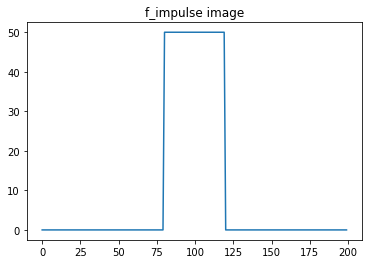

=================== setup ====================
(n_1, n_2, m) = (200, None, 200)
problem       = 1D Blur
lam           = 1000
B             = <class 'scipy.sparse.dia.dia_matrix'>
ROI pixels    = 50
ROI row       = 100

================== contents ==================
K_diag        = [ 1.  1.  1.  1.  1.]...[ 1.  1.  1.  1.  1.]
sigma         = 3
t             = 10
ESI?          = True
ESIN?         = True
direct?       = True
================= dimensions ==================
Kb shape      = (200, 200)
X shape       = (200, 200)
M shape       = (50, 200)
B shape       = (200, 200)
sx shape      = (200, 1)
sb shape      = (200, 1)
============= system dimensions ===============
ESI_A shape   = (400, 400)
ESI_b shape   = (400,)
ESIN_A shape  = (400, 400)
ESIN_b shape  = (400,)


/Users/jakeroth/anaconda/lib/python2.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [3]:
# single test
## problem
n_1 = 200
k = 50
lam = 1000
sigma = 3
t = 10
p = problems.Problem(prob='b', n_1=n_1, k=k, lam=lam, ESI=True, dir_soln=True)
p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
p.summarize()

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.435
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.474
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.426
===== method = all ======================================================================
          lam: 1.00E+03
            k: 50
    max iters: 50
    tolerance: 1e-05
    raar step: 2
      dr step: 2
     beta: 0.05
===== method = all ======================================================================



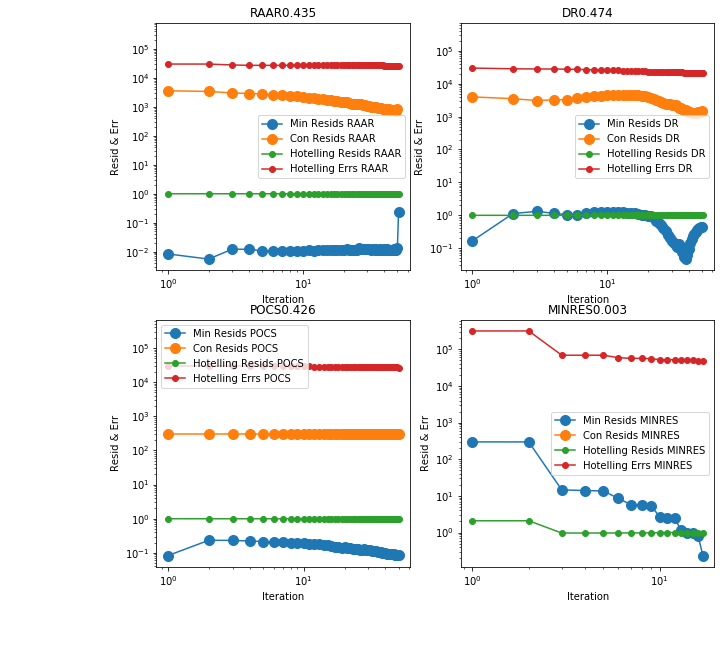

In [4]:
## examples: solve problem - - - - - - - - - - - - - - - - -
# projection.test_proj_alg(prob=p, method='pocs')
# projection.test_proj_alg(prob=p, method='dr', sl=1.25)
# projection.test_proj_alg(prob=p, method='raar')
# projection.test_proj_alg(prob=p, method='minres')
m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all',max_iter=50, beta=0.05)

In [5]:
# set blur parameters
sigma  = 3
t      = 10
sparse = True

# set dimensions
n_1    = 200
kk     = np.linspace(10, 190, 3)

# find condition number of XtX
tp = problems.Problem(prob='b', n_1=n_1, k=k, ESI=True, dir_soln=True)
tp._set_inputs(K_diag=np.ones(p.n), sigma=3, t=10, sparse=True)
tp._set_operators()
XtX = tp.X.toarray().T.dot(tp.X.toarray())
kappa = la.cond(XtX)

# set regularization
lamlam = [0.1, 1, 10]
lamlam = [0.01] + [kappa*lam for lam in lamlam]

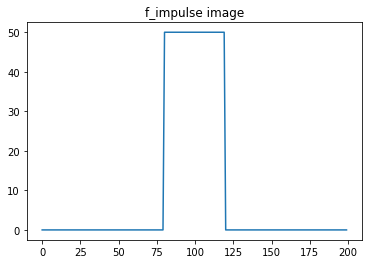

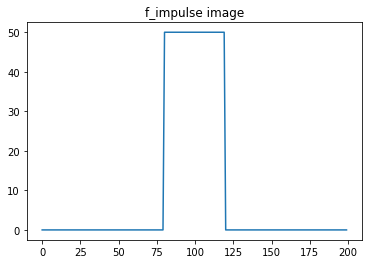

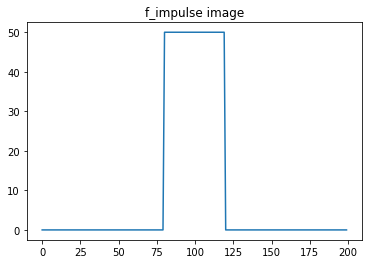

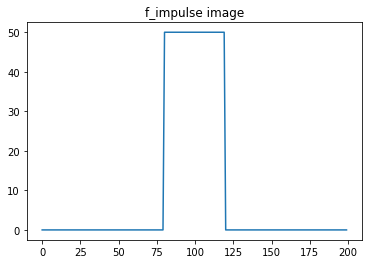

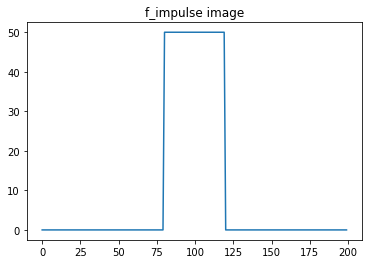

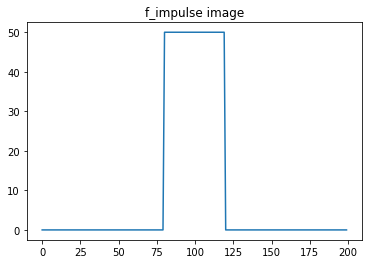

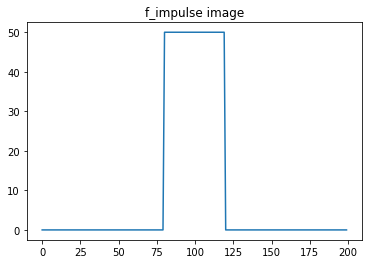

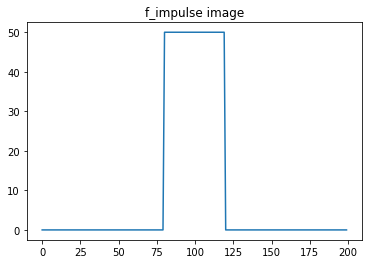

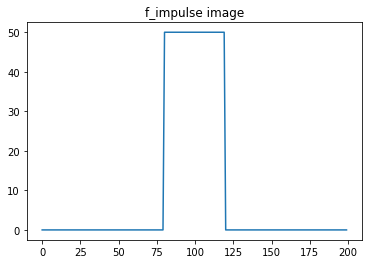

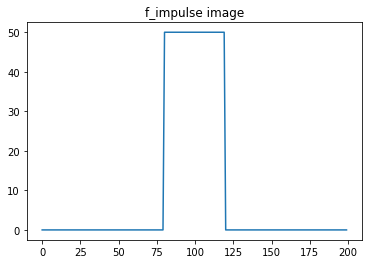

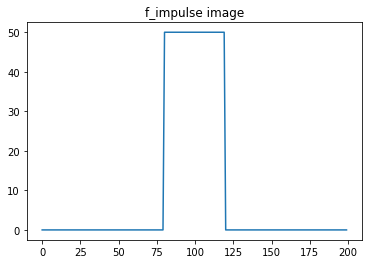

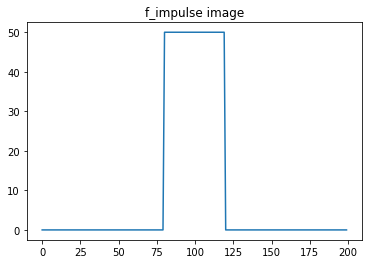

In [6]:
# create problems
ps = []
for k in kk:
    for lam in lamlam:
        p = problems.Problem(prob='b', n_1=n_1, k=k, lam=lam, ESI=True, dir_soln=True)
        p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
        ps.append(p)

In [7]:
# # solve problems individually
# for p in ps:
#     projection.test_proj_alg(prob=p, method='pocs')
#     projection.test_proj_alg(prob=p, method='dr', sl_dr=1.5)
#     projection.test_proj_alg(prob=p, method='raar', beta=0.5)
#     projection.test_proj_alg(prob=p, method='minres')


(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.335
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.383
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.311
===== method = all ======================================================================
          lam: 1.00E-02
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



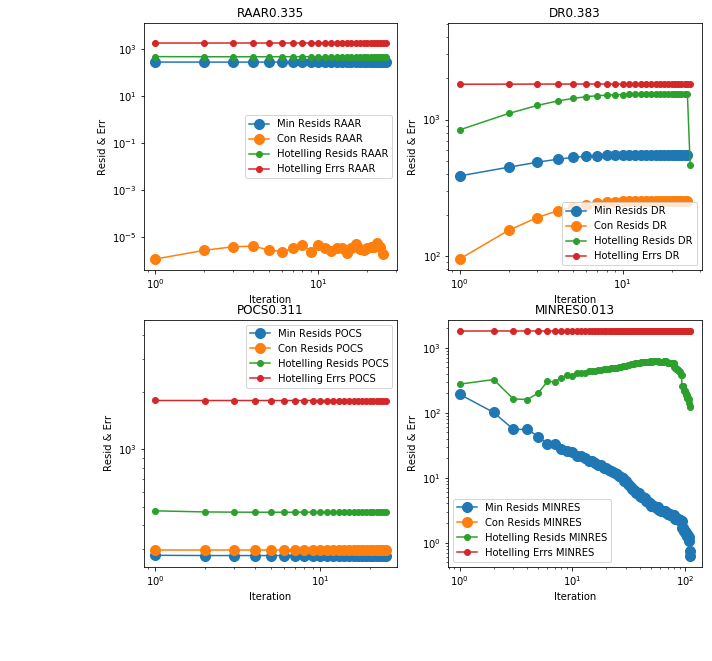

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[494.52624560858027, 494.52624560858027, 494.52624560858027, 494.52624560858027]
[1811.069106952217, 1811.069106952217, 1811.069106952217, 1811.069106952217]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.234
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.221
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.213
===== method = all ======================================================================
          lam: 1.95E+09
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



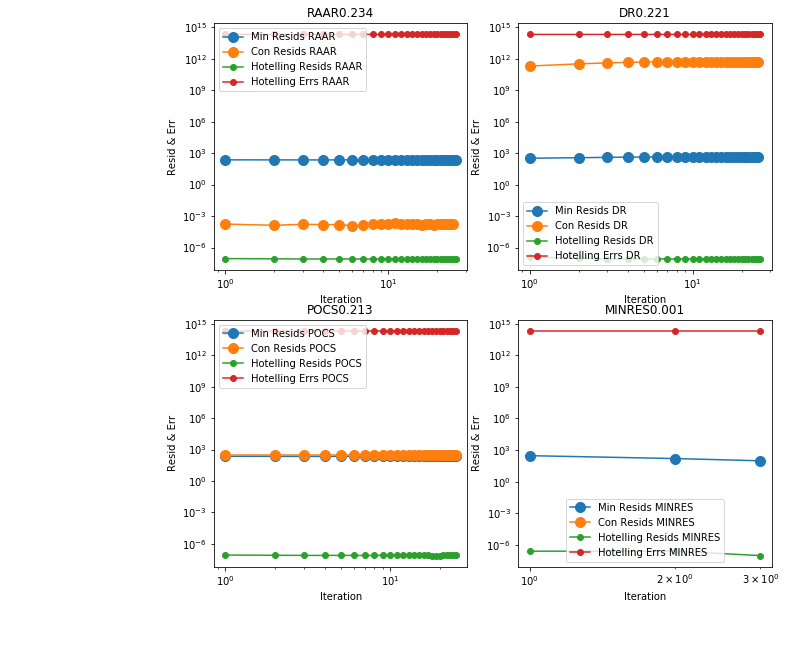

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.5636077213667988e-07, 2.5636077213667988e-07, 2.5636077213667988e-07, 2.5636077213667988e-07]
[203858403169981.34, 203858403169981.34, 203858403169981.34, 203858403169981.34]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.221
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.284
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.269
===== method = all ======================================================================
          lam: 1.95E+10
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



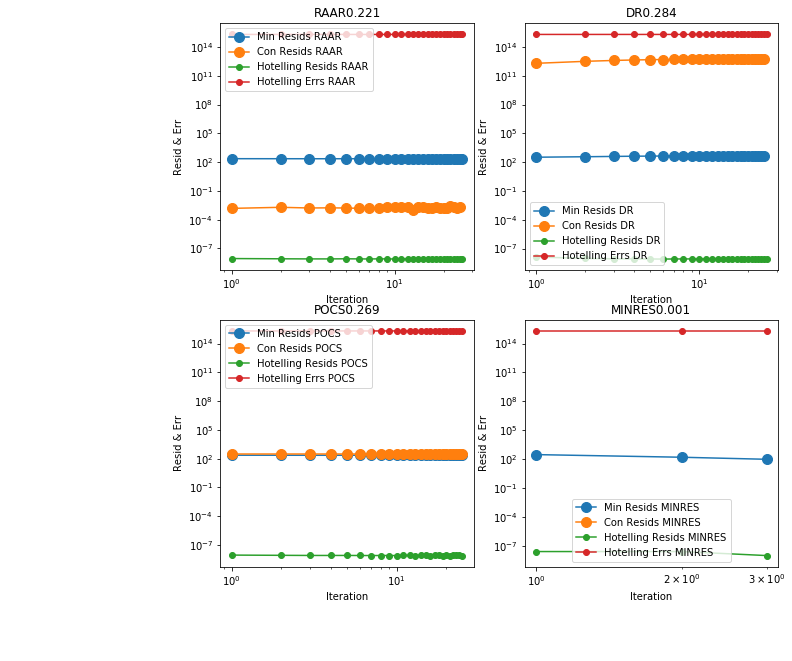

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.5636077225470976e-08, 2.5636077225470976e-08, 2.5636077225470976e-08, 2.5636077225470976e-08]
[2038584031274968.2, 2038584031274968.2, 2038584031274968.2, 2038584031274968.2]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.225
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.243
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.206
===== method = all ======================================================================
          lam: 1.95E+11
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



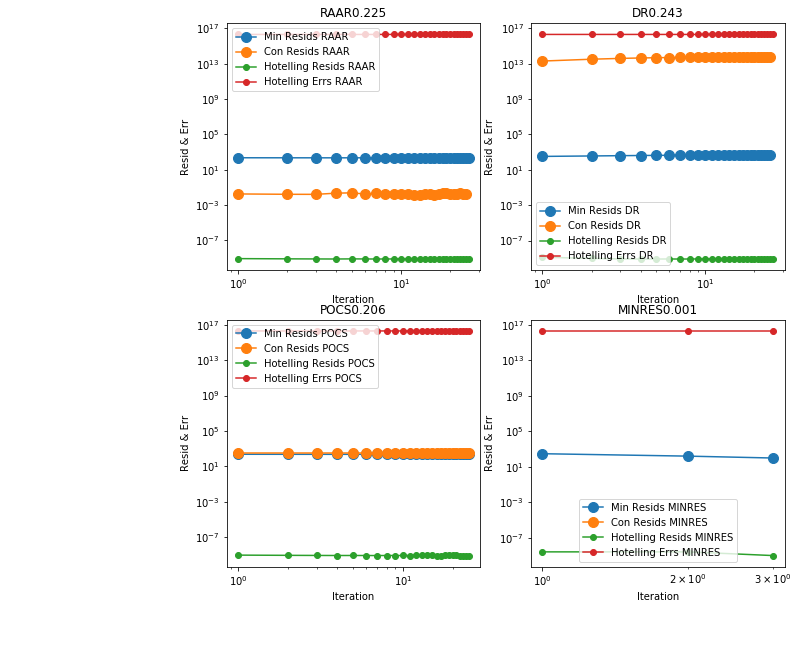

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.5636077226651281e-09, 2.5636077226651281e-09, 2.5636077226651281e-09, 2.5636077226651281e-09]
[20385840306000392.0, 20385840306000392.0, 20385840306000392.0, 20385840306000392.0]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.339
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.352
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.326
===== method = all ======================================================================
          lam: 1.00E-02
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



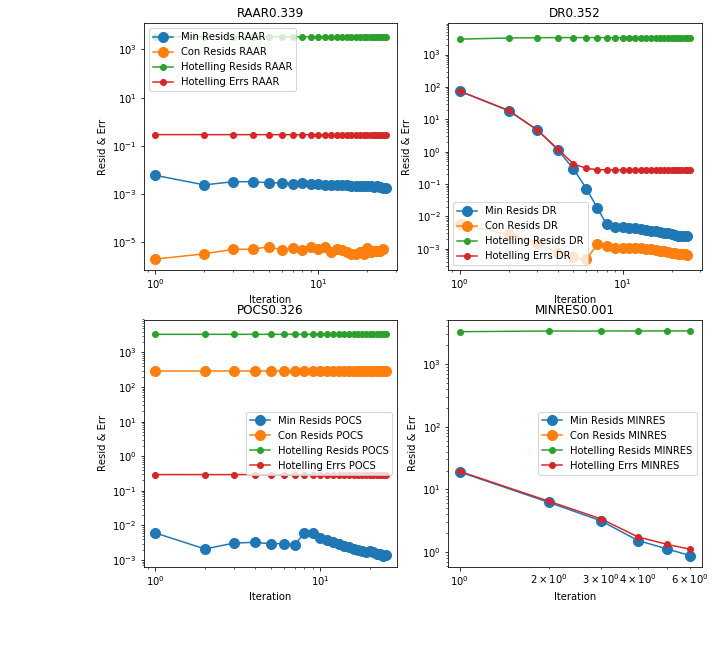

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[3088.5786901538331, 3088.5786901538331, 3088.5786901538331, 3088.5786901538331]
[299.79321156254667, 299.79321156254667, 299.79321156254667, 299.79321156254667]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.403
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.467
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.428
===== method = all ======================================================================
          lam: 1.95E+09
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



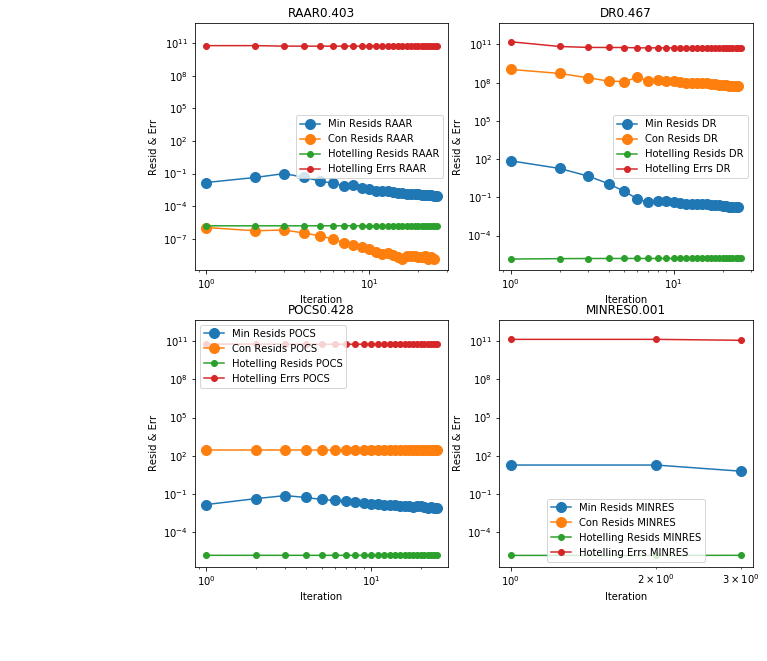

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196207467785e-06, 1.5213196207467785e-06, 1.5213196207467785e-06, 1.5213196207467785e-06]
[616746737911.7804, 616746737911.7804, 616746737911.7804, 616746737911.7804]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.468
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.476
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.463
===== method = all ======================================================================
          lam: 1.95E+10
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



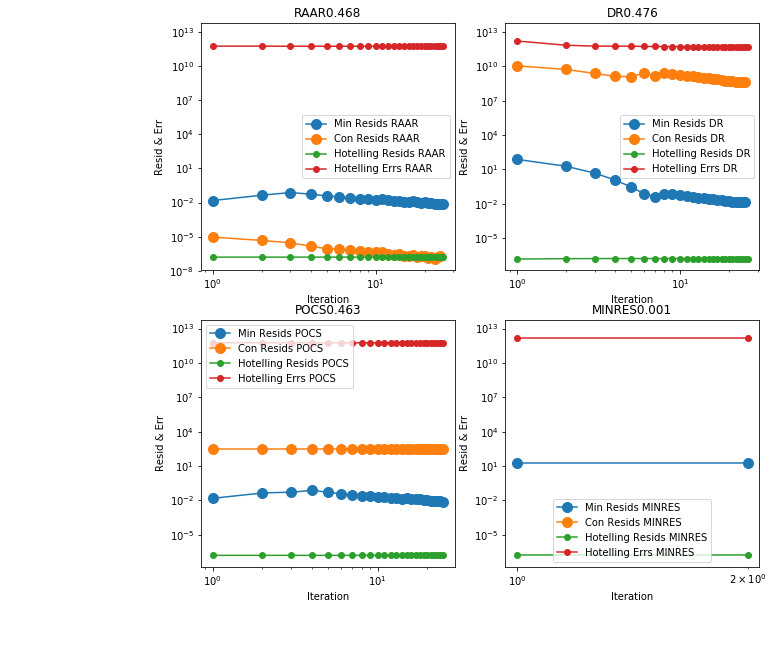

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196214272971e-07, 1.5213196214272971e-07, 1.5213196214272971e-07, 1.5213196214272971e-07]
[6167467379430.8604, 6167467379430.8604, 6167467379430.8604, 6167467379430.8604]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.443
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.44
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.346
===== method = all ======================================================================
          lam: 1.95E+11
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



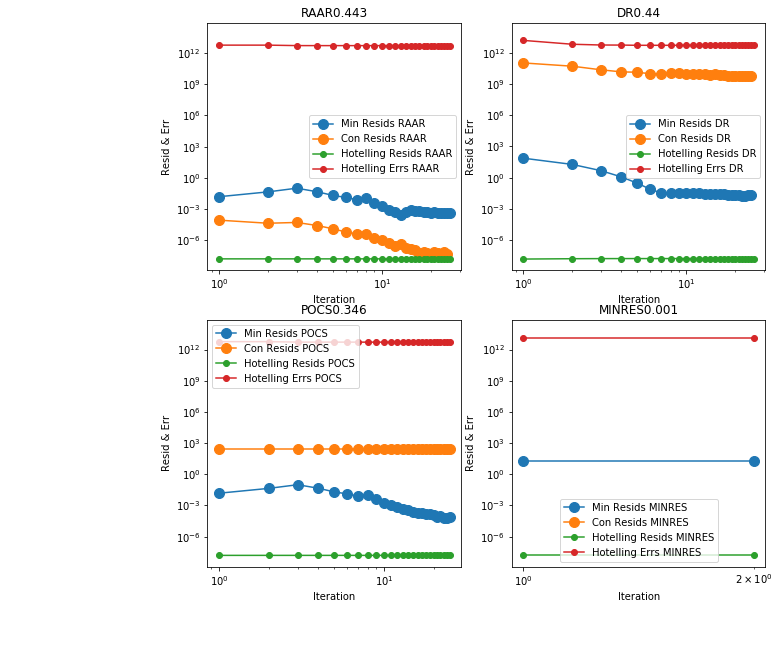

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196214953515e-08, 1.5213196214953515e-08, 1.5213196214953515e-08, 1.5213196214953515e-08]
[61674673790278.398, 61674673790278.398, 61674673790278.398, 61674673790278.398]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.53
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.537
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.5
===== method = all ======================================================================
          lam: 1.00E-02
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



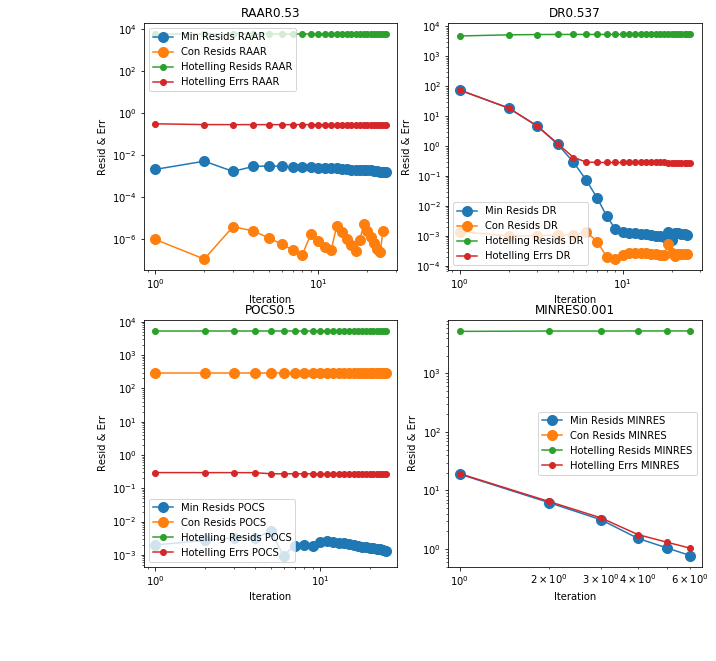

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[4257.3119277558289, 4257.3119277558289, 4257.3119277558289, 4257.3119277558289]
[299.79321156254719, 299.79321156254719, 299.79321156254719, 299.79321156254719]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.524
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.517
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.507
===== method = all ======================================================================
          lam: 1.95E+09
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



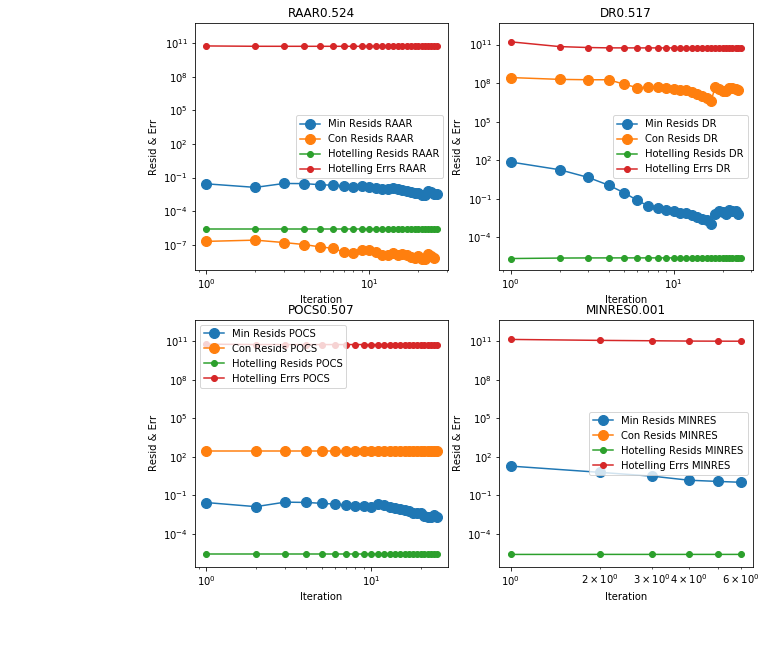

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.0969943819885114e-06, 2.0969943819885114e-06, 2.0969943819885114e-06, 2.0969943819885114e-06]
[616746737492.59668, 616746737492.59668, 616746737492.59668, 616746737492.59668]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.529
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.6
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.527
===== method = all ======================================================================
          lam: 1.95E+10
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



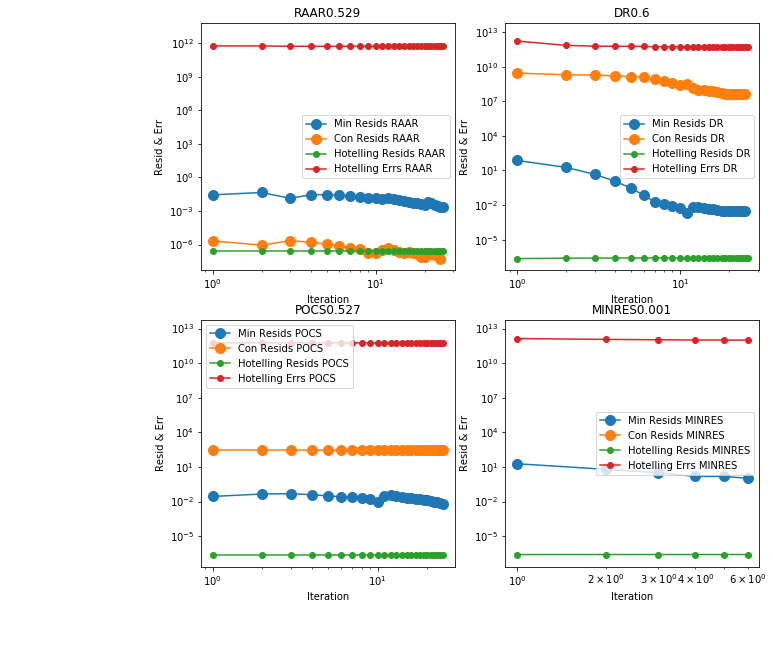

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.0969943829265383e-07, 2.0969943829265383e-07, 2.0969943829265383e-07, 2.0969943829265383e-07]
[6167467379802.5322, 6167467379802.5322, 6167467379802.5322, 6167467379802.5322]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
runtime: 0.554
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
runtime: 0.568
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
runtime: 0.541
===== method = all ======================================================================
          lam: 1.95E+11
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



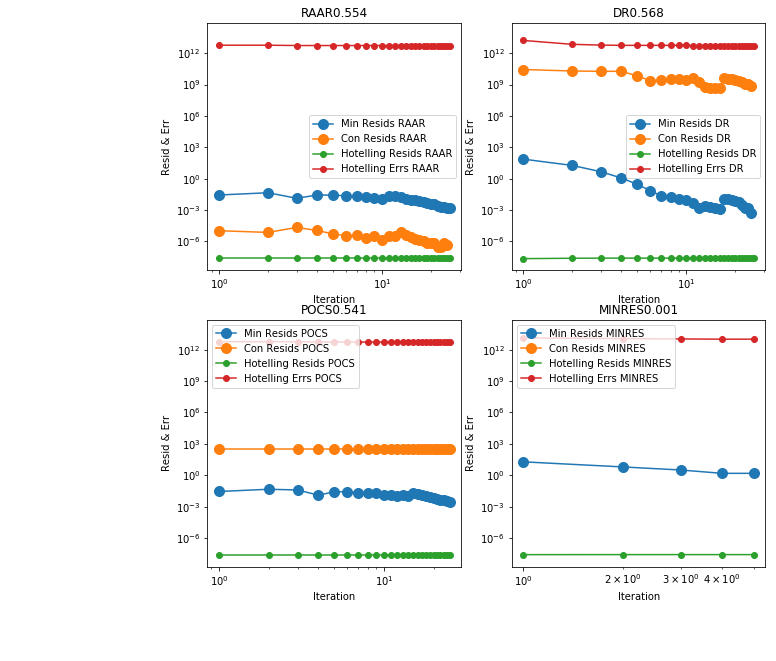

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.0969943830203336e-08, 2.0969943830203336e-08, 2.0969943830203336e-08, 2.0969943830203336e-08]
[61674673846784.805, 61674673846784.805, 61674673846784.805, 61674673846784.805]



In [8]:
# solve problems together
m_rs = []
c_rs = []
h_rs = []
h_es = []
for p,idx in zip(ps,range(len(ps))):
    m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all', sl_dr=1.5, beta=0.5, max_iter=25)
    m_rs.append([m_r[i][0] for i in range(4)])
    c_rs.append([c_r[i][0] for i in range(3)])
    h_rs.append([h_r[i][0] for i in range(4)])
    h_es.append([h_e[i][0] for i in range(4)])
    print(m_rs[idx])
    print(c_rs[idx])
    print(h_rs[idx])
    print(h_es[idx])
    print("")

-  __2D blur__
> - pixels = 1050
>> - dims: 21 $\times$ 50
> - ROI(k) = 5, 25, 45 with 3 steps (middle row 10)
> - $\lambda$ = 0.01, $\kappa$ $\times$ 0.01, $\kappa$, $\kappa$ $\times$ 10
> - B = identity

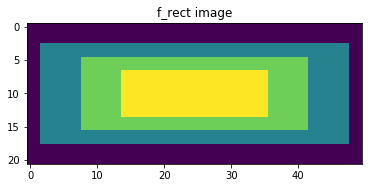

=================== setup ====================
(n_1, n_2, m) = (21, 50, 1050)
problem       = 2D Blur
lam           = 1000
B             = <class 'scipy.sparse.dia.dia_matrix'>
ROI pixels    = 50
ROI row       = 10

================== contents ==================
K_diag        = [ 1.  1.  1.  1.  1.]...[ 1.  1.  1.  1.  1.]
sigma         = 3
t             = 10
ESI?          = True
ESIN?         = True
direct?       = True
================= dimensions ==================
Kb shape      = (1050, 1050)
X shape       = (1050, 1050)
M shape       = (50, 1050)
B shape       = (1050, 1050)
sx shape      = (1050, 1)
sb shape      = (1050, 1)
============= system dimensions ===============
ESI_A shape   = (2100, 2100)
ESI_b shape   = (2100,)
ESIN_A shape  = (2100, 2100)
ESIN_b shape  = (2100,)


In [9]:
# single test
## problem
n_1 = 21
n_2 = 50
k = 50
lam = 1000
sigma = 3
t = 10
p = problems.Problem(prob='b', n_1=n_1, n_2=n_2, k=k, lam=lam, ESI=True, dir_soln=True)
p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
p.summarize()

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 36.762
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 36.857
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 35.552
===== method = all ======================================================================
          lam: 1.00E+03
            k: 50
    max iters: 50
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.05
===== method = all ======================================================================



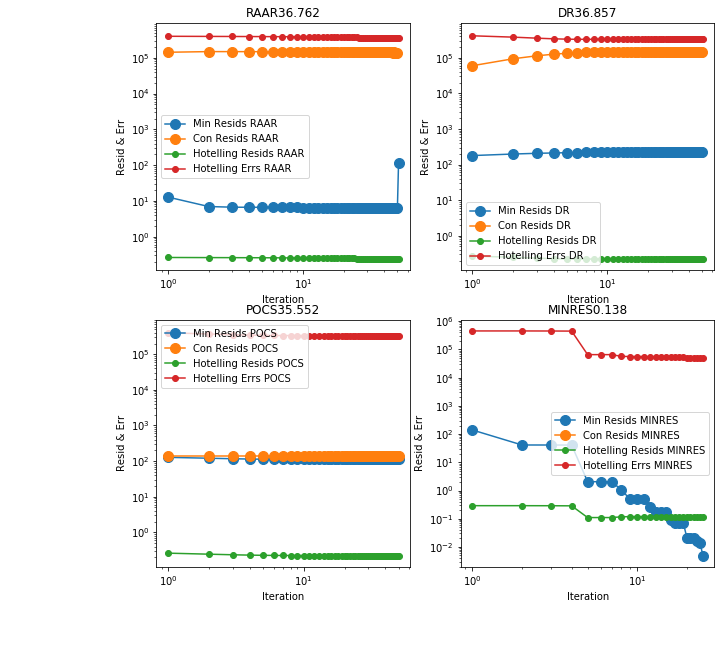

In [10]:
m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all',max_iter=50, beta=0.05, sl_dr=1.5)

In [11]:
# set blur parameters
sigma  = 3
t      = 10
sparse = True

# set dimensions
n_1    = 21
n_2    = 50
k      = 50
kk     = [5, 25, 45]

# find condition number of XtX
tp = problems.Problem(prob='b', n_1=n_1, n_2=n_2, k=k, ESI=False, dir_soln=False)
tp._set_inputs(K_diag=np.ones(p.n), sigma=3, t=10, sparse=True)
tp._set_operators()
XtX = tp.X.toarray().T.dot(tp.X.toarray())
kappa = la.cond(XtX)

# set regularization
lamlam = [0.1, 1, 10]
lamlam = [0.01] + [kappa*lam for lam in lamlam]

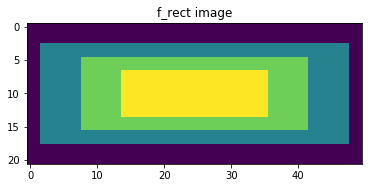

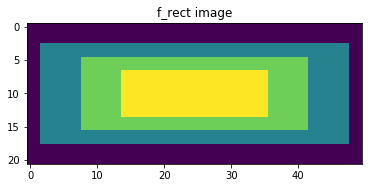

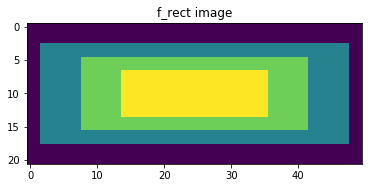

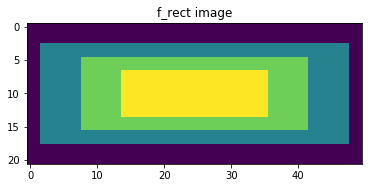

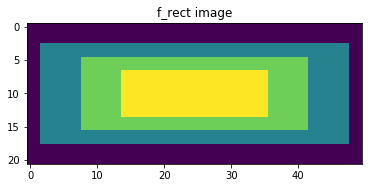

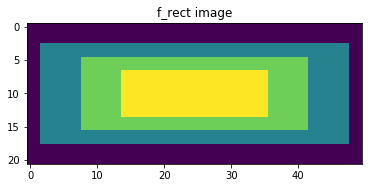

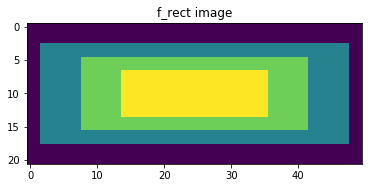

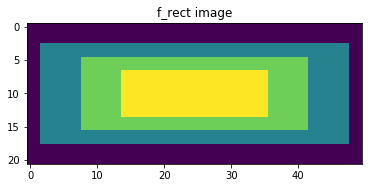

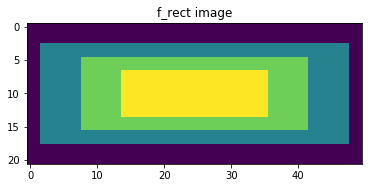

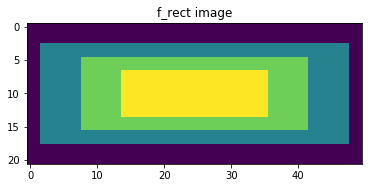

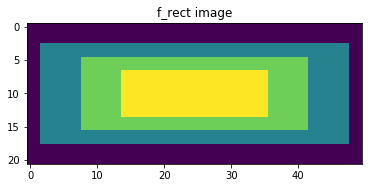

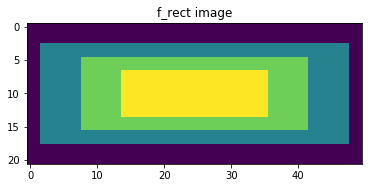

In [12]:
# create problems
ps2d = []
for k in kk:
    for lam in lamlam:
        p = problems.Problem(prob='b', n_1=n_1, n_2=n_2, k=k, lam=lam, ESI=True, dir_soln=True)
        p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
        ps2d.append(p)

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 19.497
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 16.654
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 15.582
===== method = all ======================================================================
          lam: 1.00E-02
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



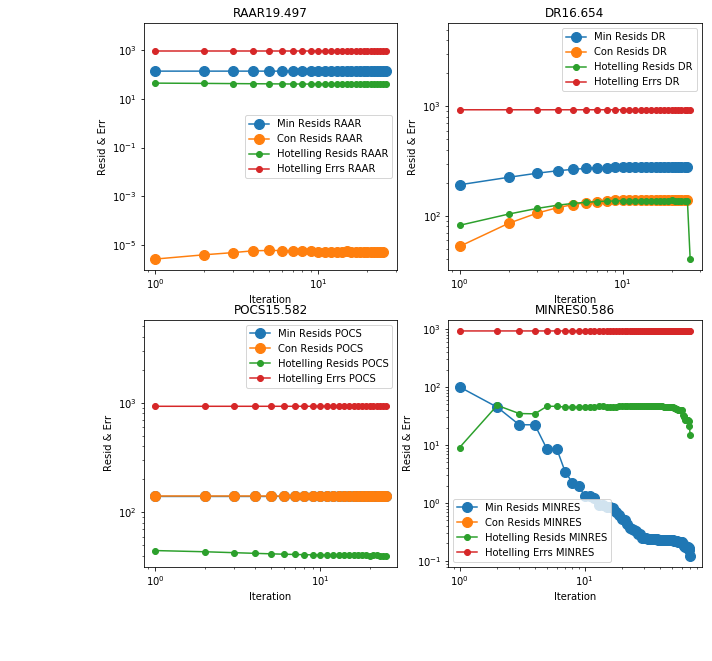

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[46.231085258529845, 46.231085258529845, 46.231085258529845, 46.231085258529845]
[929.33363517305759, 929.33363517305759, 929.33363517305759, 929.33363517305759]

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 15.887
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 15.257
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 17.812
===== method = all ======================================================================
          lam: 9.67E+17
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



/Users/jakeroth/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


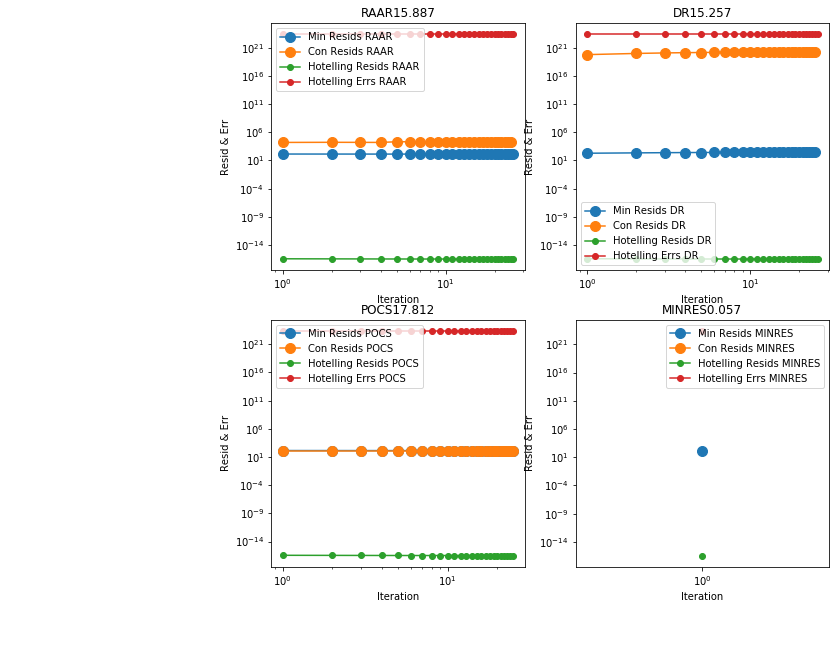

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[3.7635933783887152e-17, 3.7635933783887152e-17, 3.7635933783887152e-17, 3.7635933783887152e-17]
[2.2955216923882391e+23, 2.2955216923882391e+23, 2.2955216923882391e+23, 2.2955216923882391e+23]

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 16.016
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 15.038
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 17.935
===== method = all ======================================================================
          lam: 9.67E+18
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



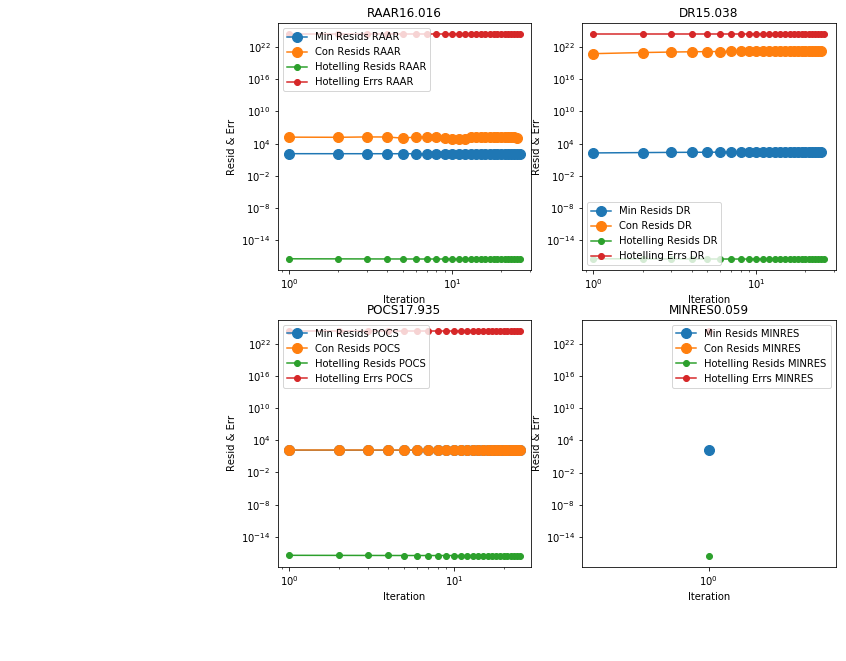

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[3.7635933783887166e-18, 3.7635933783887166e-18, 3.7635933783887166e-18, 3.7635933783887166e-18]
[2.2955216894169916e+24, 2.2955216894169916e+24, 2.2955216894169916e+24, 2.2955216894169916e+24]

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 15.527
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 15.878
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 15.151
===== method = all ======================================================================
          lam: 9.67E+19
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



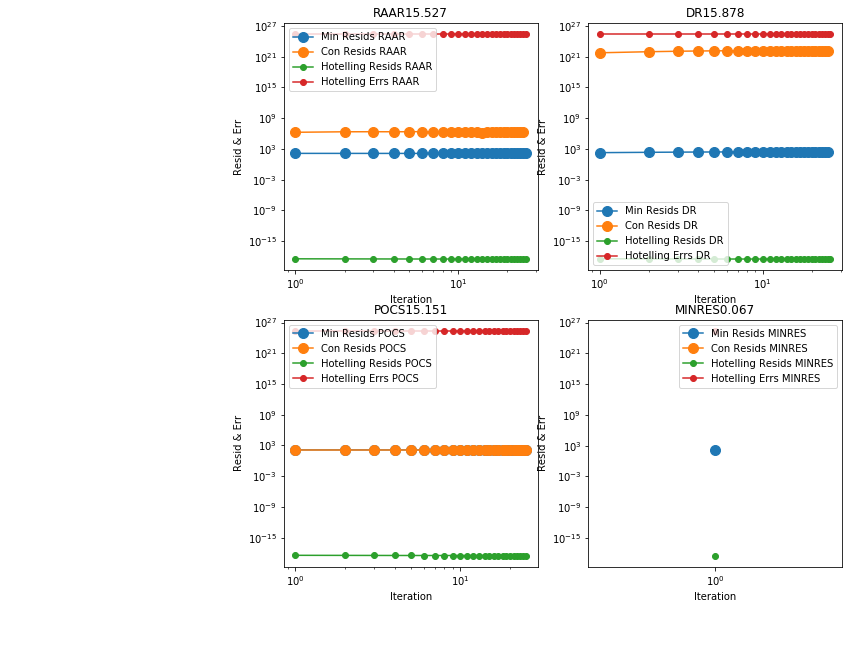

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[3.7635933783887157e-19, 3.7635933783887157e-19, 3.7635933783887157e-19, 3.7635933783887157e-19]
[2.2955216908922052e+25, 2.2955216908922052e+25, 2.2955216908922052e+25, 2.2955216908922052e+25]

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 20.537
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 19.452
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 19.315
===== method = all ======================================================================
          lam: 1.00E-02
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



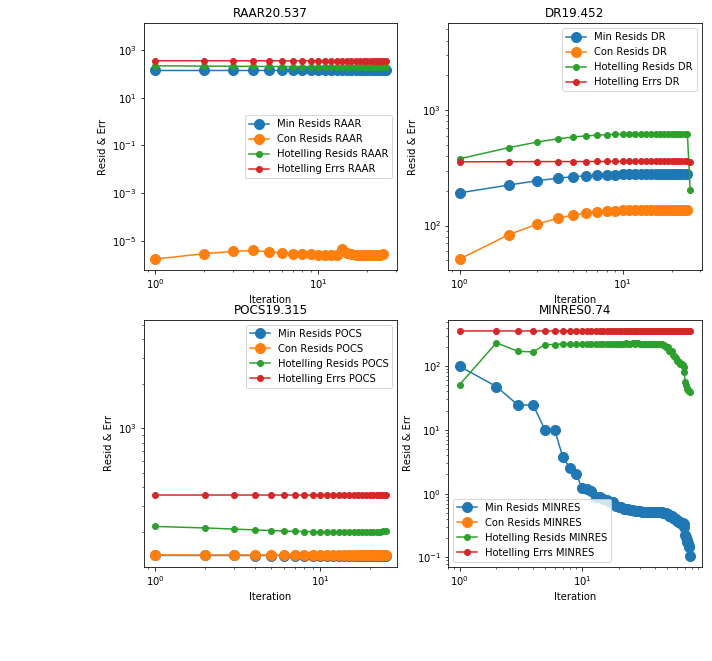

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[225.52262265488156, 225.52262265488156, 225.52262265488156, 225.52262265488156]
[355.94620527568719, 355.94620527568719, 355.94620527568719, 355.94620527568719]

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 16.079
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 19.902
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 17.095
===== method = all ======================================================================
          lam: 9.67E+17
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



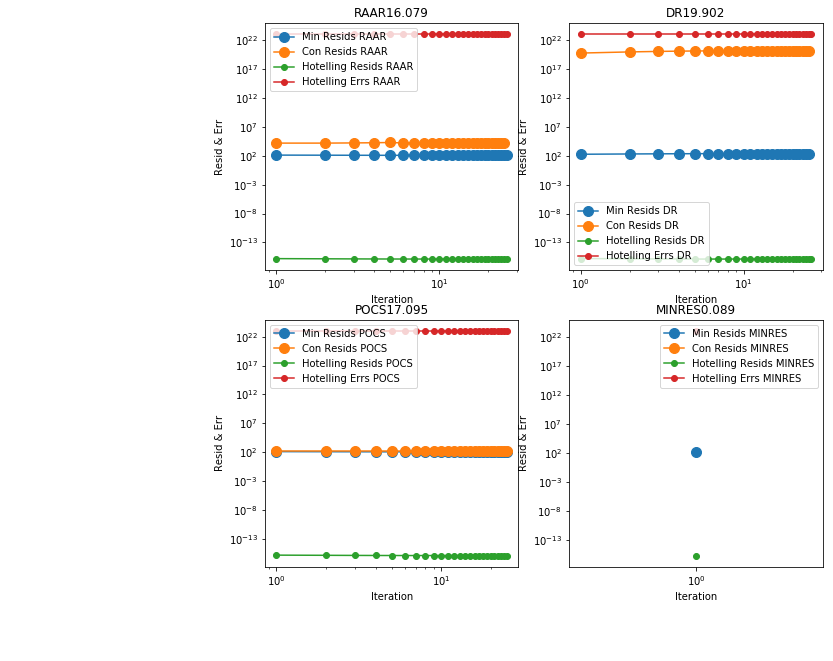

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[1.8091136442572456e-16, 1.8091136442572456e-16, 1.8091136442572456e-16, 1.8091136442572456e-16]
[9.7333911342865678e+22, 9.7333911342865678e+22, 9.7333911342865678e+22, 9.7333911342865678e+22]

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 21.358
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 19.799
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 16.464
===== method = all ======================================================================
          lam: 9.67E+18
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



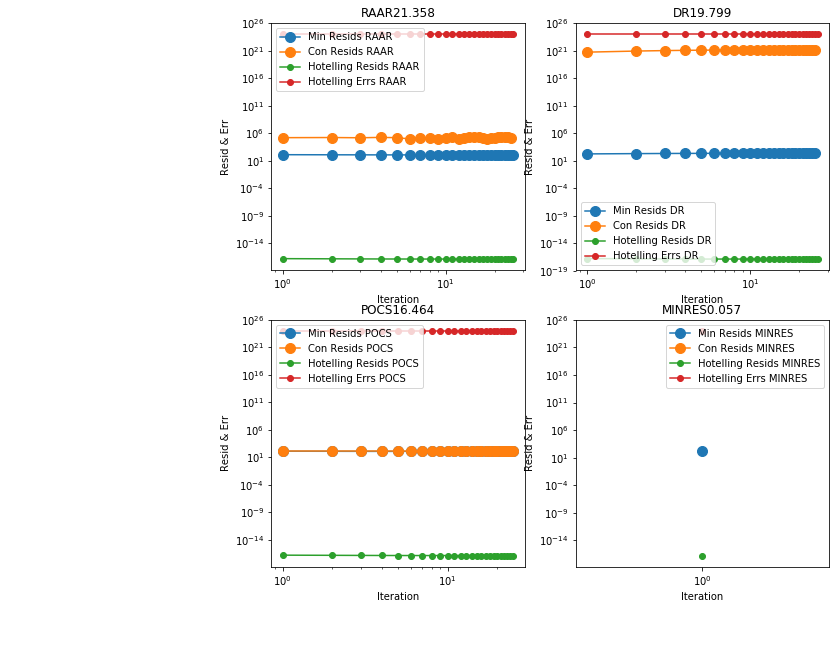

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[1.8091136442572451e-17, 1.8091136442572451e-17, 1.8091136442572451e-17, 1.8091136442572451e-17]
[9.7333911052177912e+23, 9.7333911052177912e+23, 9.7333911052177912e+23, 9.7333911052177912e+23]

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 16.411
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 20.627
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 16.468
===== method = all ======================================================================
          lam: 9.67E+19
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



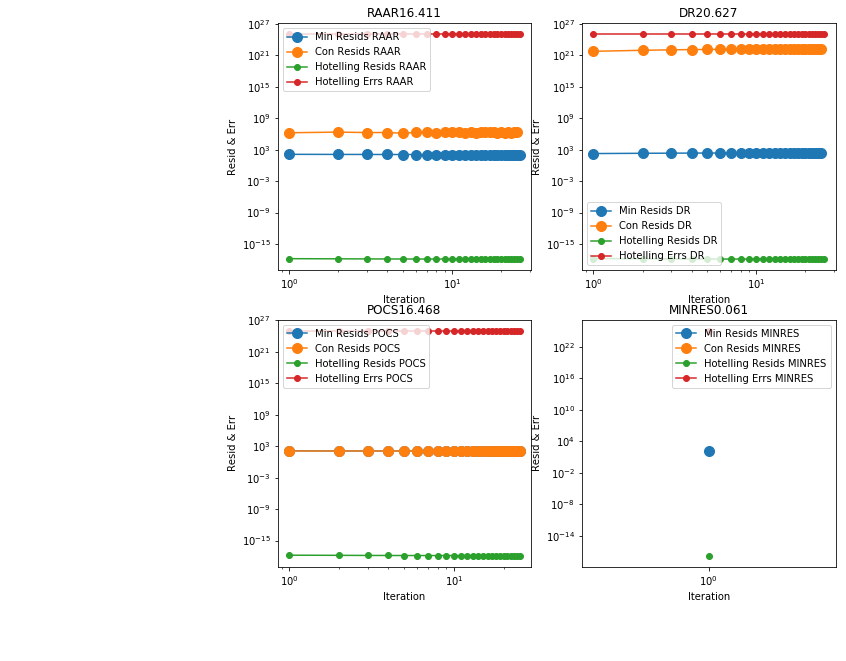

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[1.809113644257246e-18, 1.809113644257246e-18, 1.809113644257246e-18, 1.809113644257246e-18]
[9.7333911232134967e+24, 9.7333911232134967e+24, 9.7333911232134967e+24, 9.7333911232134967e+24]

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 21.482
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 21.939
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 18.935
===== method = all ======================================================================
          lam: 1.00E-02
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



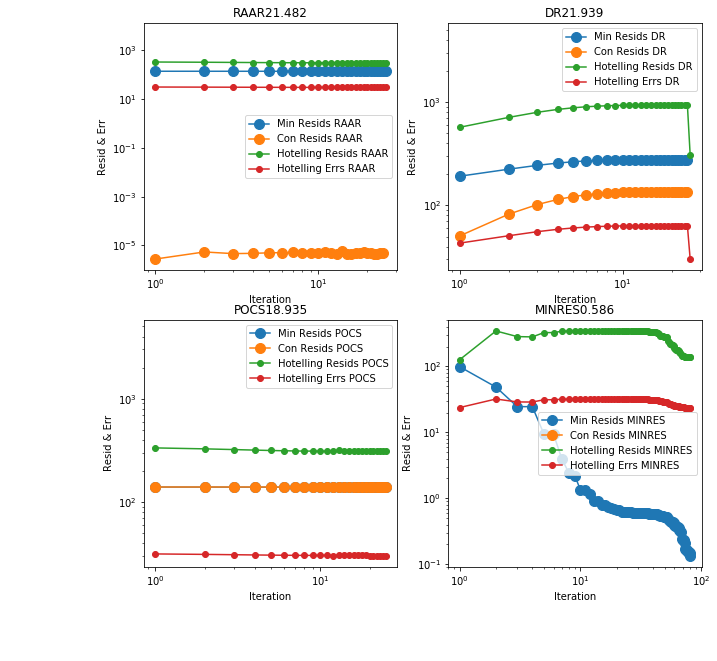

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[343.6150801626398, 343.6150801626398, 343.6150801626398, 343.6150801626398]
[31.86741074668678, 31.86741074668678, 31.86741074668678, 31.86741074668678]

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 18.921
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 20.942
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 17.877
===== method = all ======================================================================
          lam: 9.67E+17
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



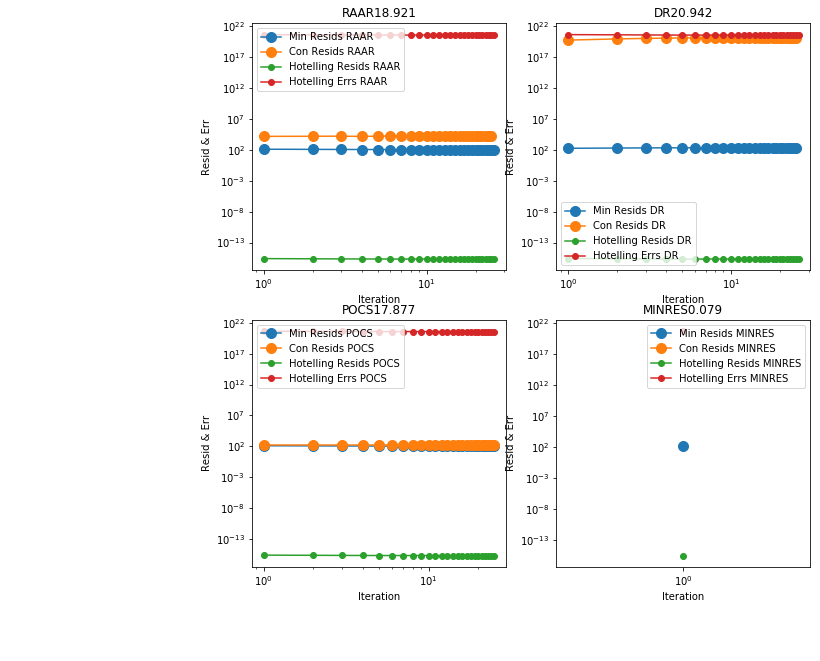

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[2.8215304024103774e-16, 2.8215304024103774e-16, 2.8215304024103774e-16, 2.8215304024103774e-16]
[4.7845322504291195e+20, 4.7845322504291195e+20, 4.7845322504291195e+20, 4.7845322504291195e+20]

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 17.736
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 20.128
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 18.618
===== method = all ======================================================================
          lam: 9.67E+18
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



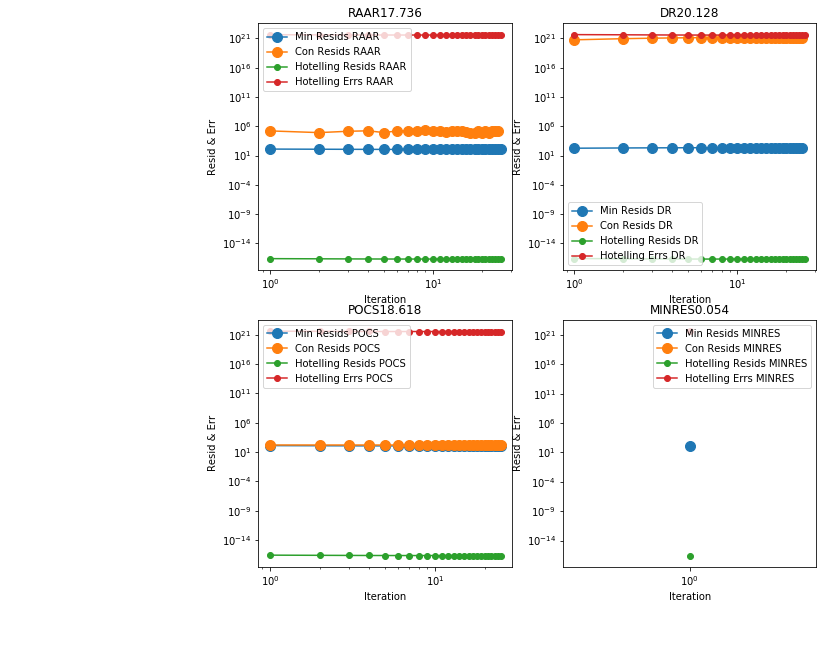

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[2.821530402410378e-17, 2.821530402410378e-17, 2.821530402410378e-17, 2.821530402410378e-17]
[4.7845322187743177e+21, 4.7845322187743177e+21, 4.7845322187743177e+21, 4.7845322187743177e+21]

(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
runtime: 18.303
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
runtime: 19.544
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
runtime: 17.271
===== method = all ======================================================================
          lam: 9.67E+19
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



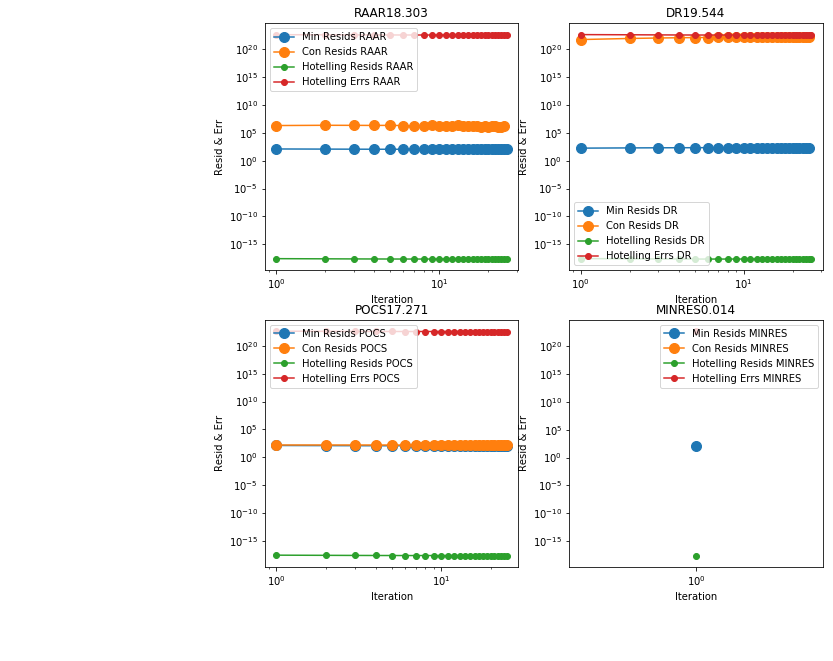

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[2.8215304024103823e-18, 2.8215304024103823e-18, 2.8215304024103823e-18, 2.8215304024103823e-18]
[4.7845322087031621e+22, 4.7845322087031621e+22, 4.7845322087031621e+22, 4.7845322087031621e+22]



In [15]:
# solve problems together
m_rs = []
c_rs = []
h_rs = []
h_es = []
for p,idx in zip(ps2d,range(len(ps2d))):
    m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all', sl_dr=1.5, beta=0.5, max_iter=25)
    m_rs.append([m_r[i][0] for i in range(4)])
    c_rs.append([c_r[i][0] for i in range(3)])
    h_rs.append([h_r[i][0] for i in range(4)])
    h_es.append([h_e[i][0] for i in range(4)])
    print(m_rs[idx])
    print(c_rs[idx])
    print(h_rs[idx])
    print(h_es[idx])
    print("")